# UBER CROSS VALIDATION STUDY CASE

In this occasion we will see the Uber traffic data. This data consists of millions order summaries from April 2014 until September 2014 in New York City. From this case study data we will analyze the order pattern based on the hours, weekdays, date, month, year, and even the coordinate location of the order to learn how data visualization and analysis could unravel potential in maximizing profit.

## LIBRARIES AND DATA IMPORT

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
from folium.plugins import HeatMap
import folium

import pydeck as pdk
import ipywidgets as widgets

In [2]:
files = os.listdir('uber-traffic')
files

['Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
# WE WILL USE 2014 DATA ONLY AND THEREFORE WE'LL DISCARD THE 2015 DATA
files.remove('uber-raw-data-janjune-15.csv')
files.remove('Uber-Jan-Feb-FOIL.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
path = 'uber-traffic'

final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + '/' + file)
    final = pd.concat([df,final])

In [5]:
final.shape

(4534327, 4)

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [7]:
df = final.copy()
df.head(15)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


## EXPLORATORY DATA ANALYSIS: DAILY ORDER PATTERN

We will begin by converting the Date/Time section to proper format supported by Pandas Datetime type. After that we will breakdown the Hour, Weekday, Days, Month, Year to each separate columns so it will make us easier to analyze the trends over these variables.

In [8]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format= '%m/%d/%Y %H:%M:%S')

In [9]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour

df

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,22,4,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,26,4,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,31,4,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,32,4,23


In [10]:
fig = px.bar(x = df['weekday'].value_counts().index,
       y = df['weekday'].value_counts().values)

fig.update_layout(
    title="Total Trips Order Based on Weekdays",
    xaxis_title="Weekdays",
    yaxis_title="Order Count"
)

REMARKS: From the histogram above we can see that the most taxi order happens in Thursday and Friday, and the lowest taxi order happens in Monday and Sunday. So, surprisingly majority of taxi orders happen in middle of the week rather than in the beginning or the end of the week. Now, let see the patterns based on the hours per each day.

Text(0, 0.5, 'Order Count')

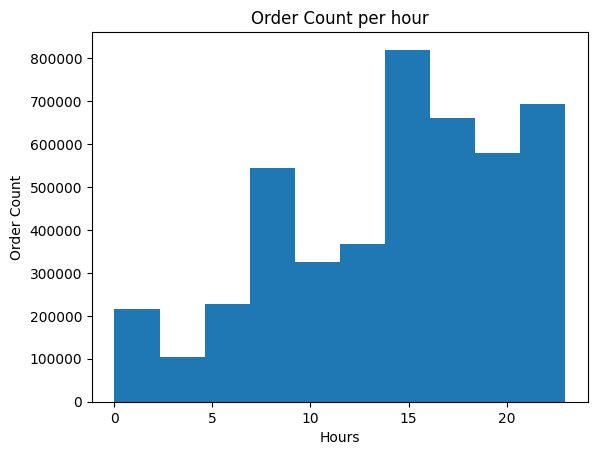

In [11]:
plt.hist(df['hour'])
plt.title(f'Order Count per hour')
plt.xlabel('Hours')
plt.ylabel('Order Count')

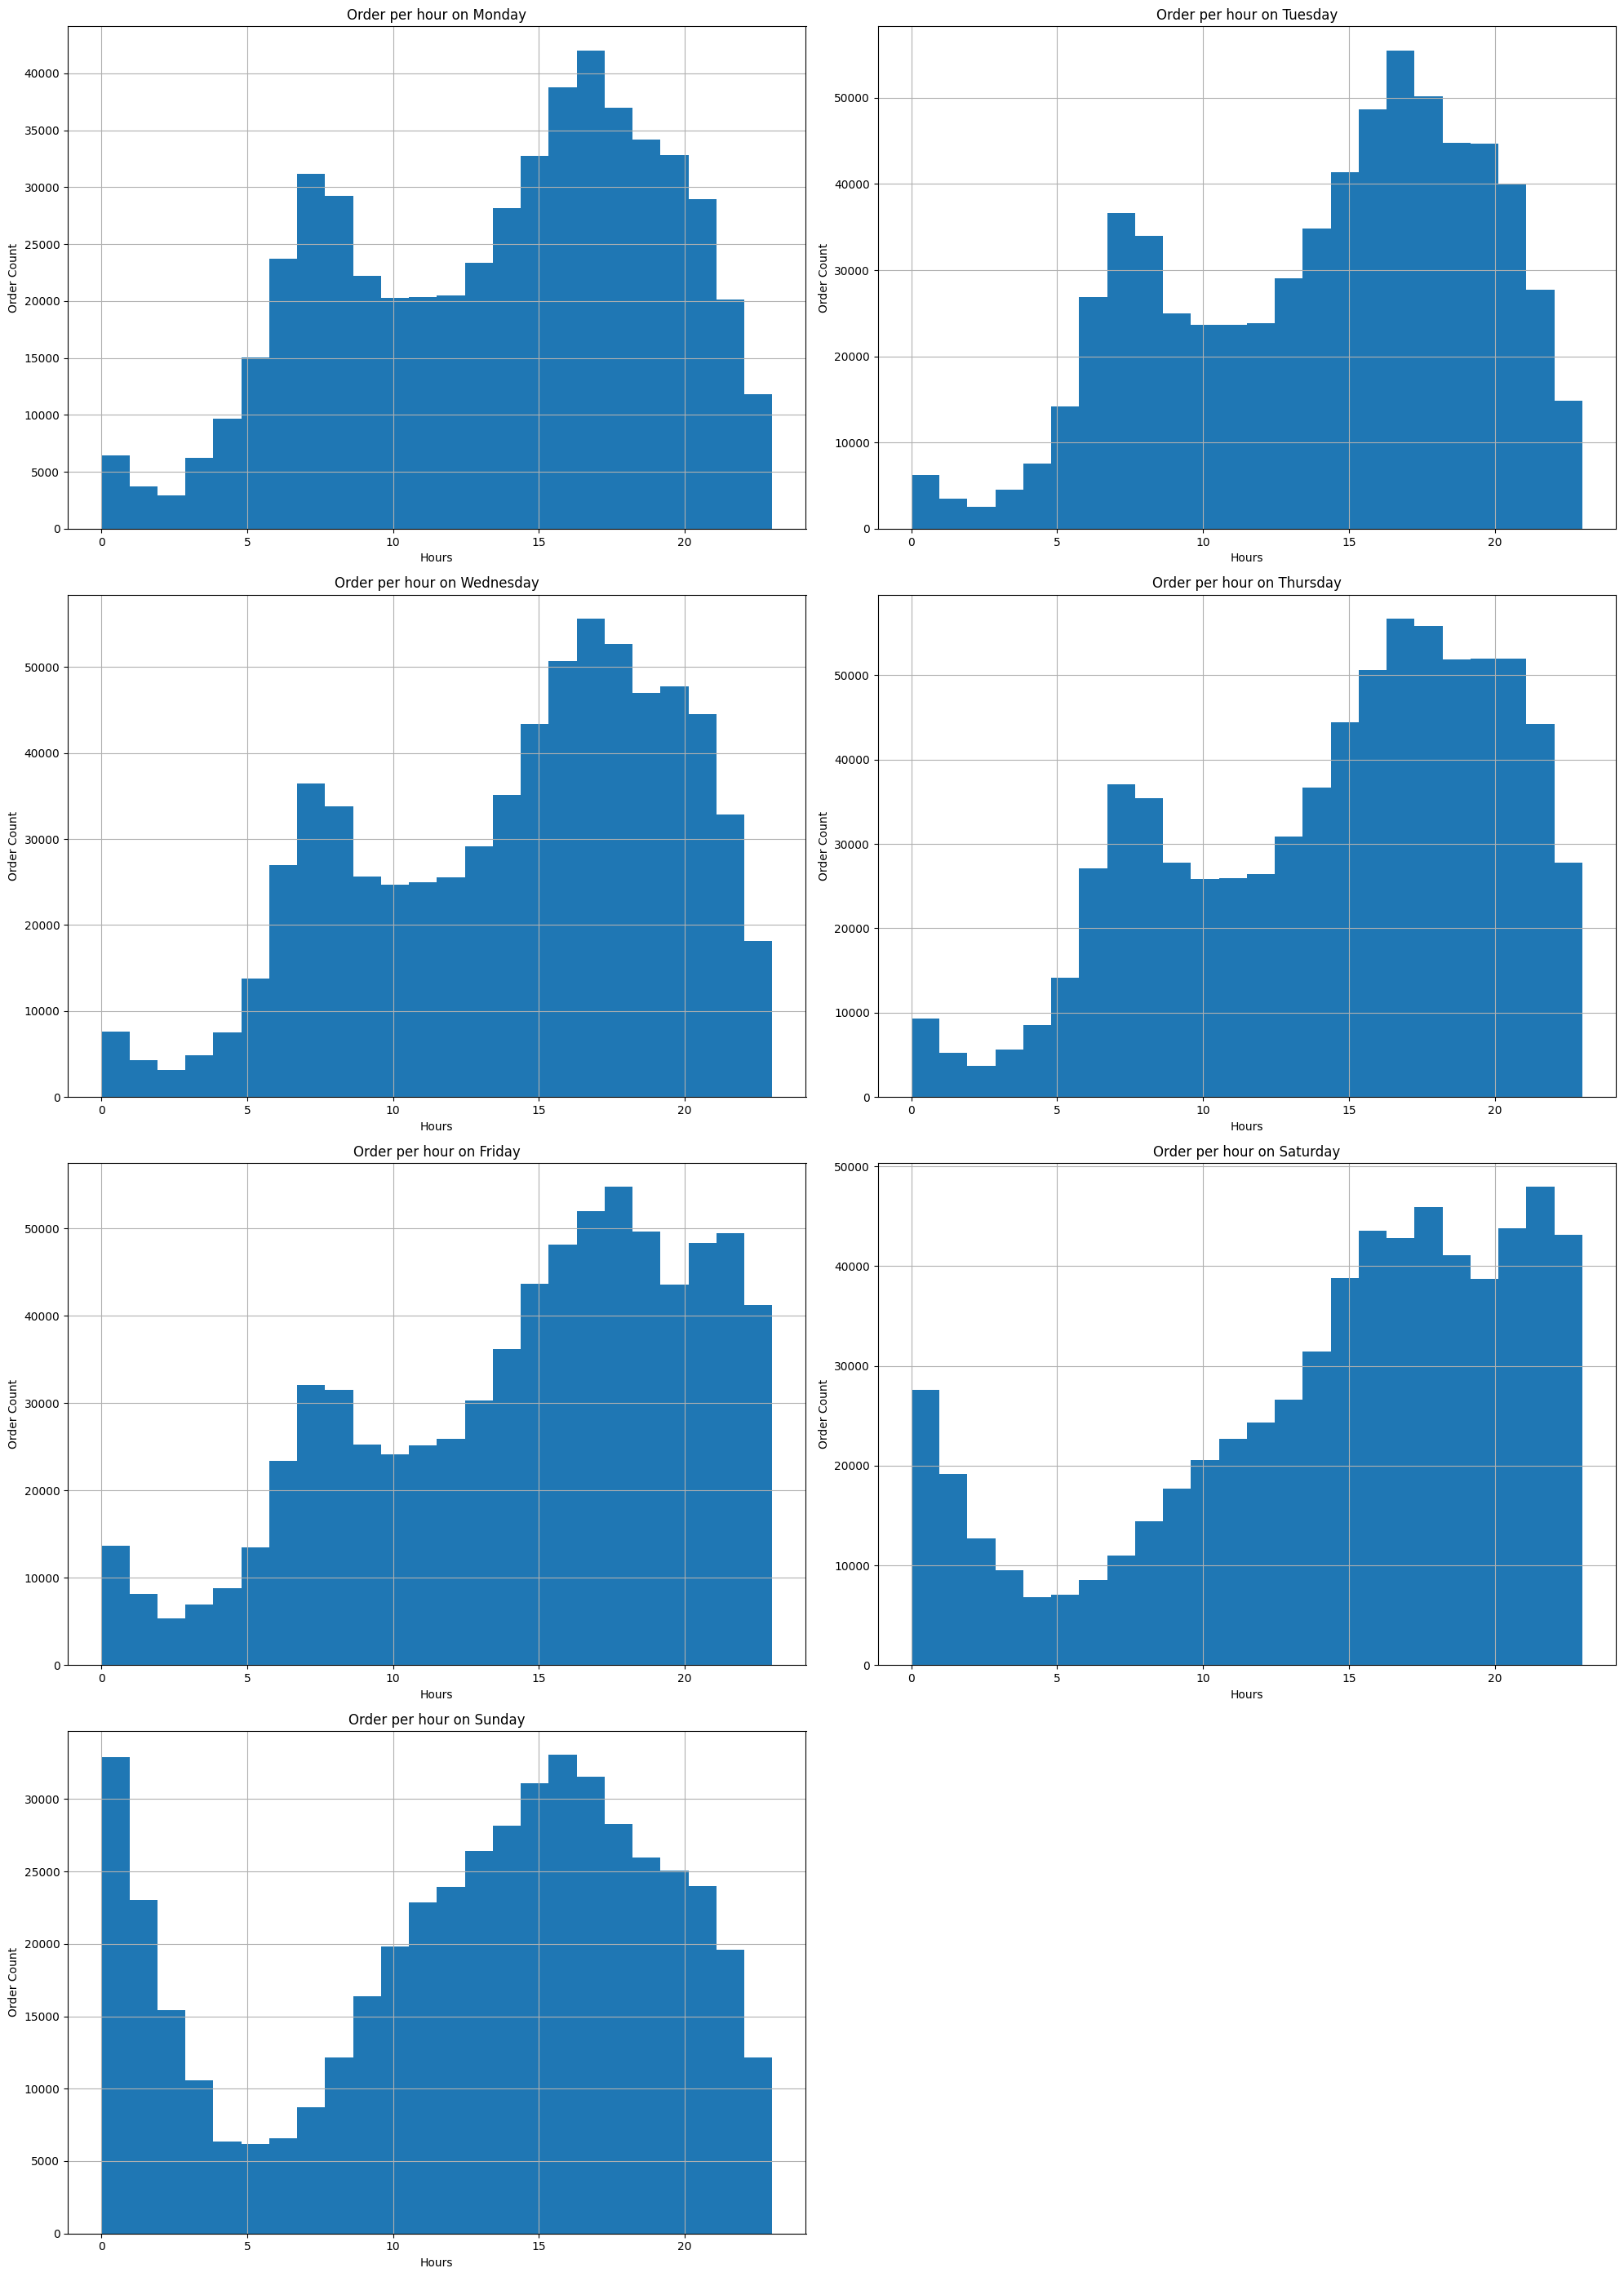

In [12]:
plt.figure(figsize = (20,28))
for i, day in enumerate(df['weekday'].unique()):
    plt.subplot(4,2,i+1)
    df[df['weekday']==day]['hour'].hist(bins=24)
    plt.title(f'Order per hour on {day}')
    plt.xlabel('Hours')
    plt.ylabel('Order Count')

plt.tight_layout()
plt.show()

In [13]:
pivot = pd.pivot_table(df, values='Base', index='weekday',
                       columns='hour', aggfunc='count')
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


<Axes: xlabel='hour', ylabel='weekday'>

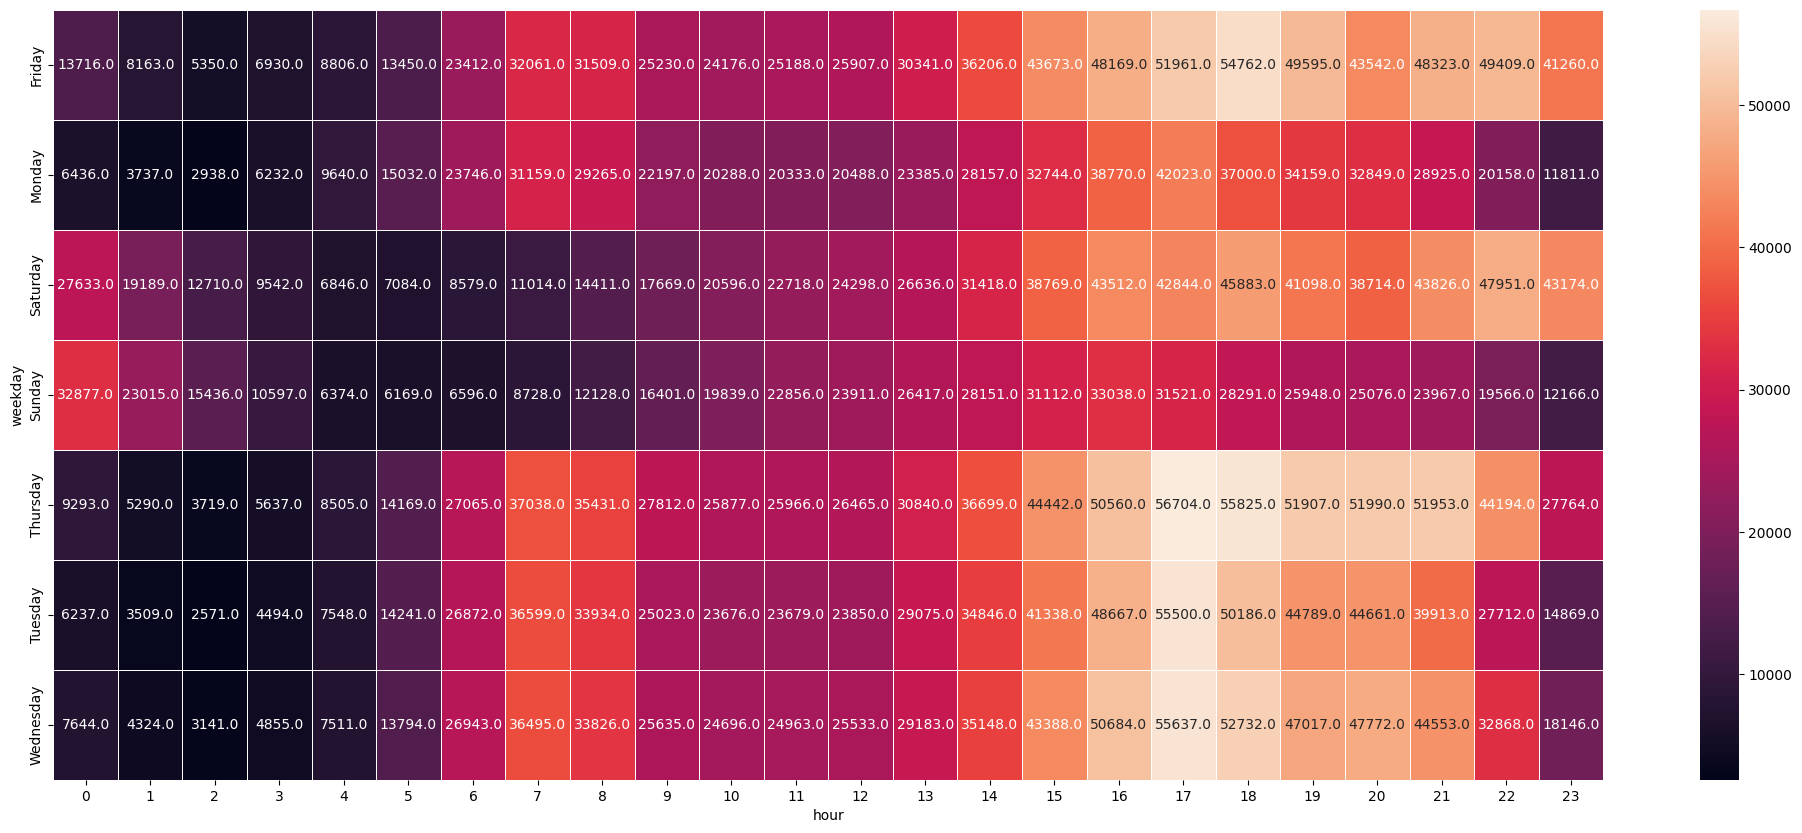

In [14]:
plt.figure(figsize=(25,10))
sns.heatmap(pivot, annot=True, linewidths=0.5, fmt='.1f')

REMARKS: If we observed the histograms and heatmap above we can notice some key mode differences between weekend and weekdays. In the working days we notice that there are two modes, the first one peaking in 7AM which related to people commuting to work and gradually descend before goint into second peak at 5PM which related to people going back home. In the weekend graphs however, the 7AM mode is not visible, but the 5PM modes still exist in weekend, this might be happening because those who works in Medical Field, Hospitality, Tourism and Entertainment are still working even in the weekend. The 5PM mode in weekend doesn't subside as the night goes through like in the weekdays, this suggesting that people might spend their night hours in the weekend doing leisure activities (this is particularly true in Friday and Saturday). We can also observed the lowest order happen in 4AM to 5AM in either Weekend or Weekdays. Let see the consitencies of the hourly orders across the whole Month.

## EXPLORATORY DATA ANALYSIS: MONTHLY ORDER PATTERN

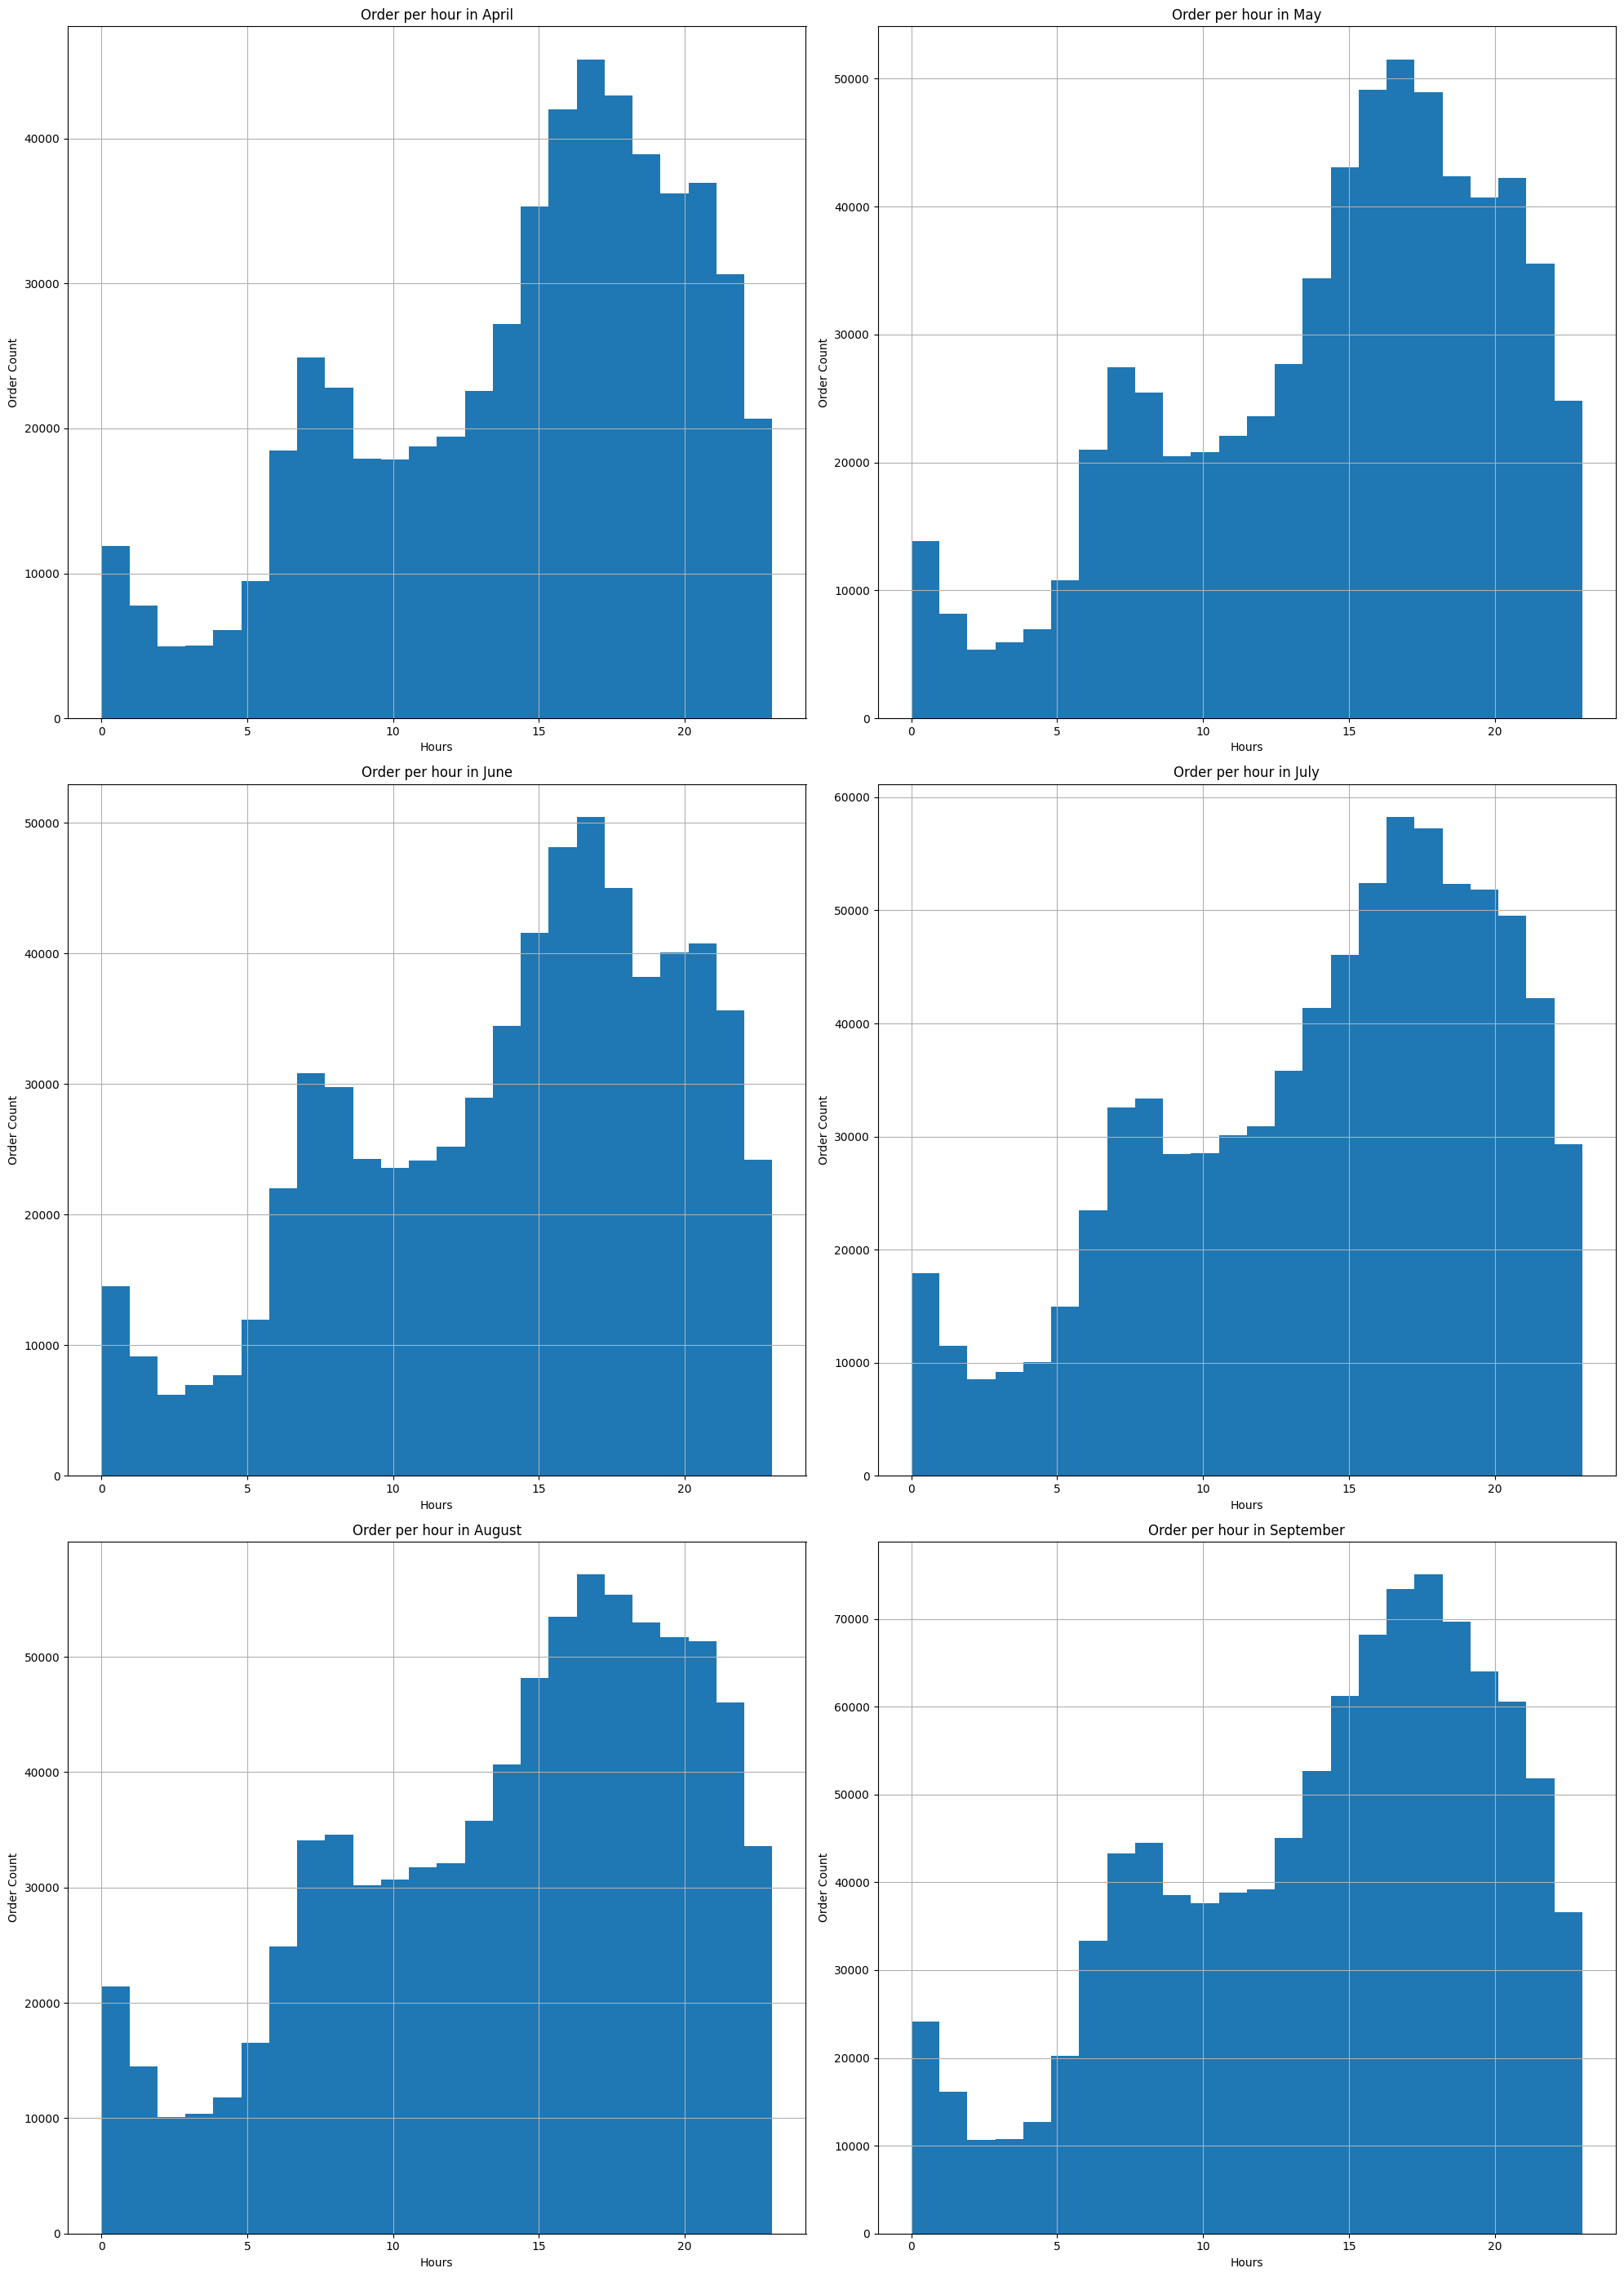

In [15]:
month_order = ['April', 'May', 'June', 'July', 'August', 'September']
month_map = {4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September'}

df['month_name'] = df['month'].map(month_map)
sorted_months = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(20, 28))
for i, month in enumerate(month_order):
    plt.subplot(3, 2, i + 1)
    df[df['month_name'] == month]['hour'].hist(bins=24)
    plt.title(f'Order per hour in {month}')
    plt.xlabel('Hours')
    plt.ylabel('Order Count')

plt.tight_layout()
plt.show()

In [16]:
totalHours = df.groupby('month_name')['hour'].count().sort_values(ascending=True)
fig = px.bar(x = totalHours.index, y = totalHours.values)

fig.update_layout(
    title="Total Order Monthly",
    xaxis_title="Month",
    yaxis_title="Order Count"
)

REMARKS: Based on the distribution showed in histograms, we can observe that multimodes order time at 7AM and 5PM are consistence each month. Furthermore, we can also observed that order traffic going gradually from lowest in the month od April to the Peak in September. This could be related to season, in April we have Spring and longer daylight, encouraging people to walk, but as the month progressed into Fall lots of people choose to take taxi instead.

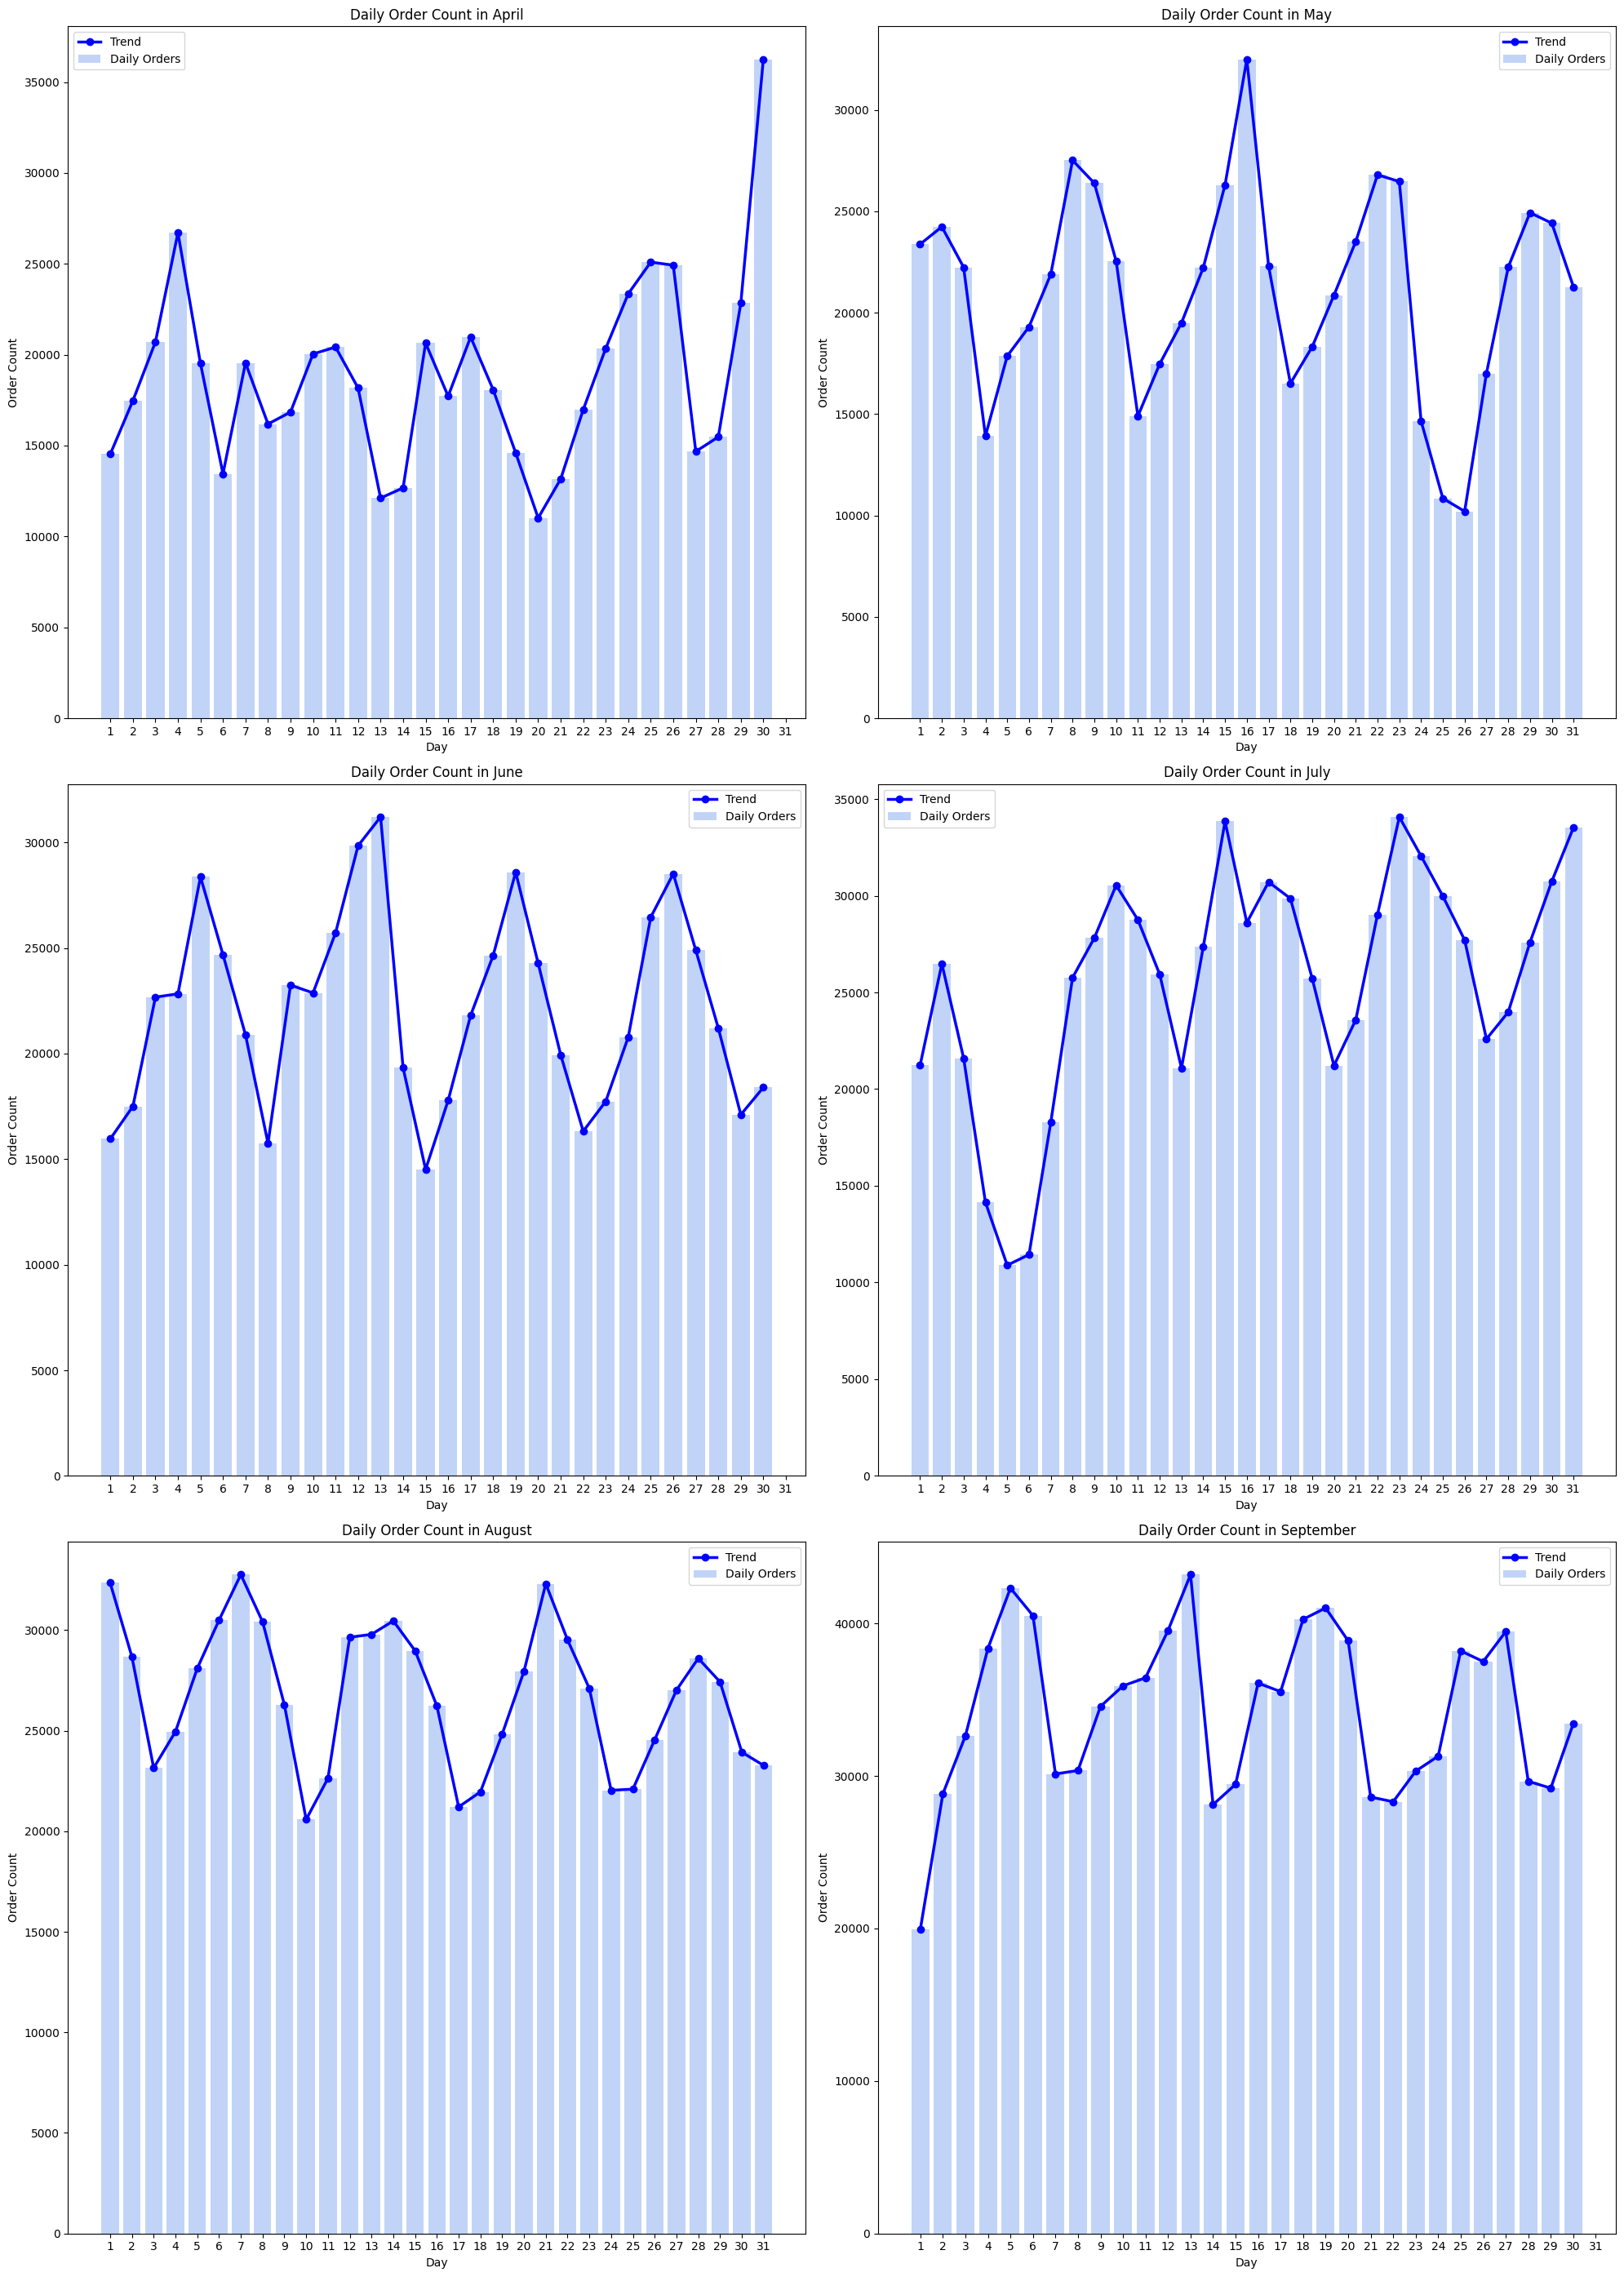

In [17]:
plt.figure(figsize=(20, 28))
for i, month in enumerate(month_order):
    plt.subplot(3, 2, i + 1)
    daily_counts = df[df['month_name'] == month]['day'].value_counts().sort_index()
    plt.bar(daily_counts.index, daily_counts.values, color='cornflowerblue', alpha=0.4, label='Daily Orders')
    plt.plot(daily_counts.index, daily_counts.values, color='blue', linewidth=2.5, marker='o', label='Trend')

    plt.title(f'Daily Order Count in {month}')
    plt.xlabel('Day')
    plt.ylabel('Order Count')
    plt.xticks(range(1, 32)) 
    plt.legend()

plt.tight_layout()
plt.show()

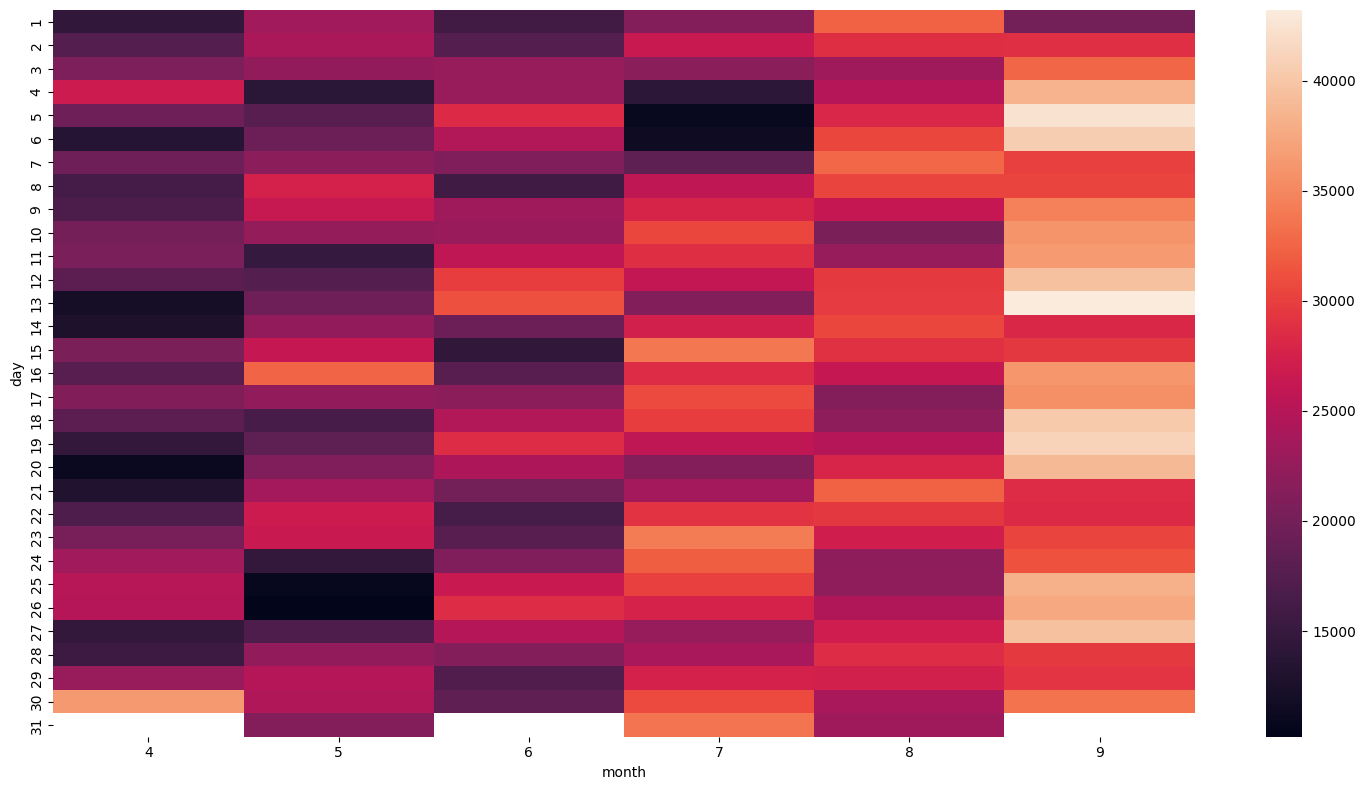

In [18]:
pivot2 = pd.pivot_table(df, values='Lon', index='day',
                       columns='month', aggfunc='count')
plt.figure(figsize=(15,8))
sns.heatmap(pivot2)
plt.tight_layout()
plt.show()

REMARKS: Based on the barchart and heatmap above, we can see a clear weekly cyclic pattern, with peaks likely aligning with weekends or paydays. This bar chart and heatmap also confirm our observation with the Histogram previously and see that the order volume steadily increases month over month, with the lowest order volume in April and steadily increase until September

## EXPLORATORY DATA ANALYSIS: GEOLOCATION ORDER PATTERN

Now that we have seen the pattern based on the day, month and year, let us investigate the order volume based on the geolocation per hour.

In [19]:
# sns.set_style(style = 'whitegrid')
# sns.pointplot(x = 'hour', y='Lat', data =df)

<Axes: xlabel='hour', ylabel='Lat'>

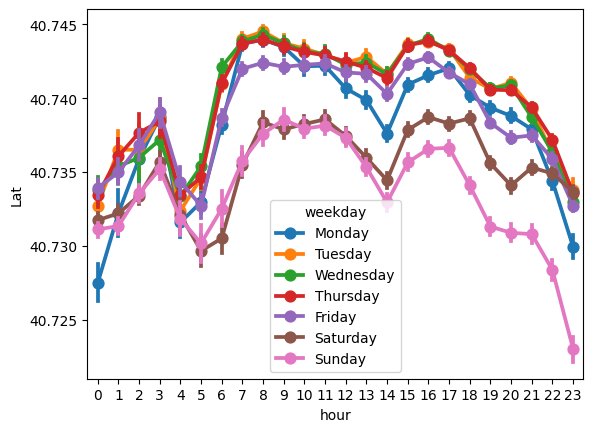

In [21]:
sns.pointplot(x='hour', y='Lat', hue='weekday', data = df)

In [19]:
category_dropdown = widgets.Dropdown(
    options=sorted(df['weekday'].unique()),
    description='Weekday:',
    value=df['weekday'].iloc[0]
)

date_slider = widgets.SelectionSlider(
    options=sorted(df['hour'].unique()),
    description='Hour:',
    value=sorted(df['hour'].unique())[0],
    continuous_update=False
)

def update_map(weekday, hour):
    filtered = df[(df['hour'] == hour) & (df['weekday'] == weekday)]
    filtered = filtered.dropna(subset=['Lat', 'Lon'])

    layer = pdk.Layer(
        "HeatmapLayer",
        data=filtered,
        get_position='[Lon, Lat]',
        get_weight=1,  # or another column like 'order_count'
        radiusPixels=50,
        opacity=0.15
    )

    view_state = pdk.ViewState(
        latitude=filtered['Lat'].mean() if not filtered.empty else 40.7128,
        longitude=filtered['Lon'].mean() if not filtered.empty else -74.0060,
        zoom=11,
        pitch=0
    )

    deck = pdk.Deck(
        layers=[layer],
        initial_view_state=view_state,
        tooltip={"text": f"{weekday} - {hour}:00"}
    )

    return deck.show()

widgets.interact(update_map, weekday=category_dropdown, hour=date_slider)

interactive(children=(Dropdown(description='Weekday:', index=1, options=('Friday', 'Monday', 'Saturday', 'Sund…

<function __main__.update_map(weekday, hour)>

REMARKS: Based on pointplot above we can observed that there are 3 modes that occur in 3AM, 7-8AM, and 4-5PM. Interestingly enough, we can see that there are shifts in the order latitude between Weekdays and Weekend. Between 0AM to 6AM the geolocation of the taxi order are quite close either in weekends or weekdays, however from 6AM onwards untill 11PM in the weekdays, most order coming from northenly latitude compared to weekend at the same hours. 

In the heatmap we can see in details that at 3AM from Monday to Sunday, the volume of order seems to be higher in Southwest part of Midtown Manhattan especially near 10th Avenue street. Between 7-8AM on Monday to Friday the high volume order located in 3 different areas Upper East Side, East Village and West Village, however it is much higher in Upper East Side area. During weekend however, the density much more clustered on south side that is East Village, West Village and Lower Manhattan. And finally, between 4-5PM on Monday to Friday, the order density is higher in Midtown East area, and on the weekend this density moves to Lower Manhattan area at the same hours. 

Apart the traffic pattern in the city, we can also observed that each day from 7AM to 12PM, there are some considerable traffic to 3 major airports near New York City and that is: John F. Kennedy International Airport, Laguardia Airport and Newark Liberty International Airport.

## EXPLORATORY DATA ANALYSIS: BASE ORDER VOLUME 

On this last section, we will take a look at order volume on the Base company. A base is basically a licensed company or business entity through which rides are coordinated. And here are the list of following Uber bases:
1. B02512 : Unter
2. B02598 : Hinter
3. B02617 : Weiter
4. B02682 : Schmecken
5. B02764 : Danach-NY

In [22]:
base = df.groupby('Base')[['Base']].count()
base.columns = ['Count']
base

,Count
Base,
B02512,205673
B02598,1393113
B02617,1458853
B02682,1212789
B02764,263899


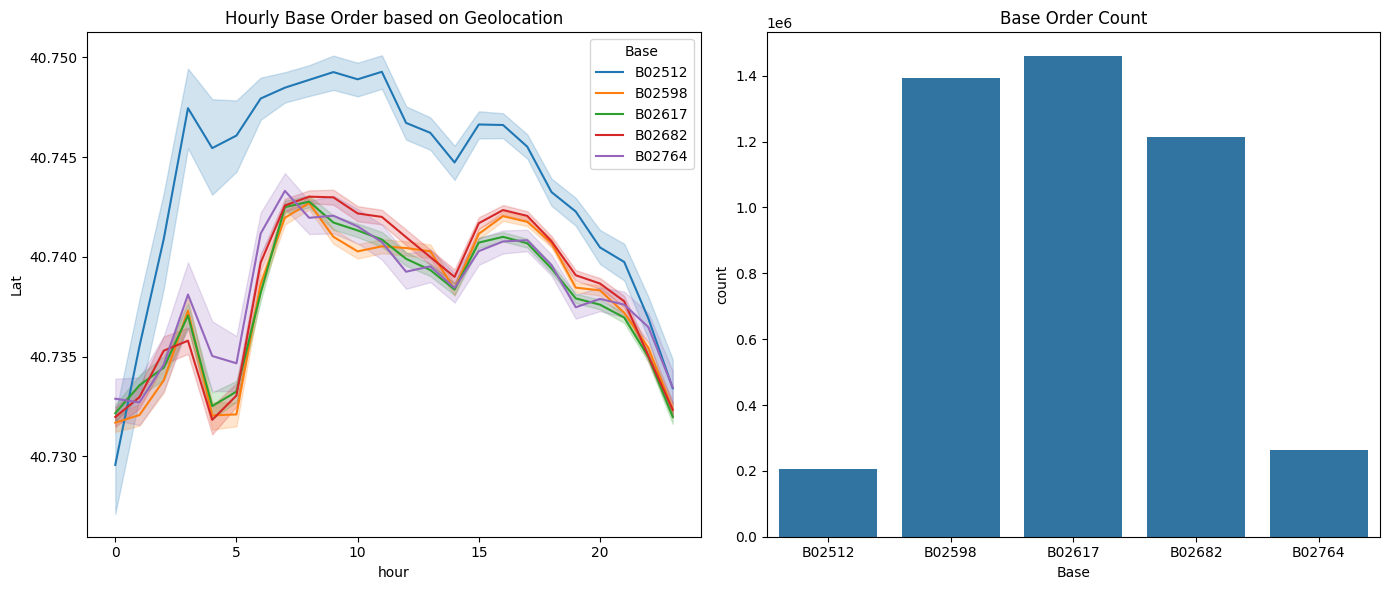

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.lineplot(x='hour', y='Lat', hue='Base', data = df)
plt.title('Hourly Base Order based on Geolocation')

plt.subplot(122)
sns.countplot(data=df, x='Base')
plt.title('Base Order Count')
plt.tight_layout()
plt.show()

REMARKS: Base B02617 has higher order density followed by B02598 and B02682. Notice these 3 bases along with B02764 follow the same hourly vs geolocation pattern, and these bases are much more prefered in southern location. B02512 base is also following the hourly vs geolocation pattern, however they're much more prefered in northernly location and their volume of order is much more inferior compared to other bases.

In [25]:
df.to_csv('uber_cross.csv', index=False)

FINAL COMMENTS: From Exploratory Data Analysis, there are some unique patterns in customer taxi order based on the hours, days, month and geolocation. This is a cross study and therefore we can’t confidently infer correlation (let alone causation), however, we can identify notable features like :
1. Multimode in hourly order which might be correspond to working hour. Notably the order volume seems to be peaked at 7AM and 5PM in normal weekdays, 12AM and 5PM in weekends.
2. Multimode in daily order that differ between normal weekdays and weekend, which might be correspond to people behavior during working days and leisure activities in the weekend.
3. Cyclic patterns in each months due to weekdays and weekends, however we can see the number of order are lower in April and gradually increase until reaching the peak at September.
4. Order volume that concentrated on particular place at particular time and day.
5. Which Uber base that gets frequently order and apparently the order volume for each base also fluctuates in the same way each hour. 

By identifying peak Uber order times and hotspot locations, stakeholders can apply dynamic pricing (surge) to increase revenue per ride. They can also optimize driver deployment by incentivizing drivers to position themselves in high-demand zones, reducing idle time and cancellations. Low-demand areas with potential can be targeted with promotions or partnerships to stimulate growth. Additionally, insights can inform smarter shift scheduling and venue collaborations to improve operational efficiency and expand market reach. Overall, these strategies might help boost both ride volume and profit margins.